In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [3]:
train = pd.read_csv("data/train.tsv", sep='\t')

In [12]:
train.head()

,id,bot,statuses_count,default_profile,default_profile_image,friends_count,followers_count,favourites_count,geo_enabled,listed_count,account_age_hours,diversity,mean_mins_between_tweets,mean_tweet_length,mean_retweets,reply_rate
0,0,0,715,0,0,423,206,150,1,34,36981,0.684902,3958.863636,97.513514,1.473684,0.504505
1,2,0,2151,0,0,1457,1321,1704,1,90,35603,0.704787,2746.533708,69.988827,3.814815,0.553073
2,3,0,439,0,0,691,213,5,0,15,38432,0.528857,11005.031847,75.101266,1.142857,0.158228
3,7,0,28,1,0,285,31,0,0,1,4898,0.810427,6495.666667,93.029412,3.000000,0.029412
4,12,0,40,0,0,907,60,1013,1,2,47238,0.831579,112167.300000,79.142857,1.000000,0.047619


In [17]:
train[train['bot']==1].describe()

,id,bot,statuses_count,default_profile,default_profile_image,friends_count,followers_count,favourites_count,geo_enabled,listed_count,account_age_hours,diversity,mean_mins_between_tweets,mean_tweet_length,mean_retweets,reply_rate
count,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.00000,243.000000,243.000000,243.000000,243.000000,243.000000,2.430000e+02,243.000000,243.000000,243.000000
mean,1641.193416,1.0,705.403292,0.658436,0.193416,898.263374,268.73251,220.069959,0.152263,19.172840,34048.654321,0.713637,4.692744e+04,86.173217,1.805527,0.295789
std,882.156013,0.0,2403.087159,0.475213,0.395791,633.124696,1019.93348,802.110120,0.360018,72.481025,17141.008604,0.170023,1.271824e+05,28.794490,2.529442,0.264483
min,35.000000,1.0,0.000000,0.000000,0.000000,22.000000,1.00000,0.000000,0.000000,0.000000,3247.000000,0.079812,1.000000e+00,13.166667,1.000000,0.000000
25%,940.000000,1.0,24.500000,0.000000,0.000000,422.000000,9.00000,0.000000,0.000000,0.000000,19808.000000,0.626281,2.384341e+03,70.293506,1.000000,0.057898
50%,1732.000000,1.0,87.000000,1.000000,0.000000,866.000000,32.00000,4.000000,0.000000,1.000000,32359.000000,0.730435,1.056761e+04,88.176471,1.111111,0.237569
75%,2394.000000,1.0,310.000000,1.000000,0.000000,1255.500000,119.00000,48.000000,0.000000,6.000000,49069.500000,0.825366,3.539367e+04,102.480769,1.722611,0.476366
max,3152.000000,1.0,19096.000000,1.000000,1.000000,3796.000000,8705.00000,7646.000000,1.000000,576.000000,76384.000000,1.000000,1.139015e+06,195.257143,29.000000,1.000000


In [18]:
train[train['bot']==0].describe()

,id,bot,statuses_count,default_profile,default_profile_image,friends_count,followers_count,favourites_count,geo_enabled,listed_count,account_age_hours,diversity,mean_mins_between_tweets,mean_tweet_length,mean_retweets,reply_rate
count,1345.000000,1345.0,1345.000000,1345.000000,1345.000000,1345.00000,1.345000e+03,1345.000000,1345.000000,1345.000000,1345.000000,1345.000000,1345.000000,1345.000000,1345.000000,1345.000000
mean,1586.307807,0.0,3636.636431,0.228996,0.001487,1721.22974,3.386648e+03,1147.754647,0.501115,96.673606,45403.576208,0.669399,8280.362097,93.294223,3.119128,0.352628
std,911.966902,0.0,8885.116391,0.420343,0.038547,13397.27522,3.682580e+04,4587.608652,0.500185,398.788614,17361.478393,0.134652,20644.976787,17.461731,21.144322,0.244302
min,0.000000,0.0,0.000000,0.000000,0.000000,16.00000,3.000000e+00,0.000000,0.000000,0.000000,2744.000000,0.005000,-15.654494,29.099099,1.000000,0.000000
25%,796.000000,0.0,320.000000,0.000000,0.000000,299.00000,1.530000e+02,33.000000,0.000000,8.000000,33611.000000,0.625000,998.426230,82.160256,1.250000,0.133333
50%,1614.000000,0.0,1025.000000,0.000000,0.000000,599.00000,3.920000e+02,181.000000,1.000000,22.000000,50024.000000,0.689831,3291.327586,93.180723,1.727273,0.342466
75%,2363.000000,0.0,3287.000000,0.000000,0.000000,1227.00000,1.009000e+03,738.000000,1.000000,66.000000,57315.000000,0.754673,8203.069767,104.234043,2.530303,0.549180
max,3175.000000,0.0,137264.000000,1.000000,1.000000,373374.00000,1.141862e+06,113640.000000,1.000000,9491.000000,78841.000000,1.000000,380028.250000,287.875912,767.588235,1.000000


friend_countで箱ひげ図を書いてみる

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


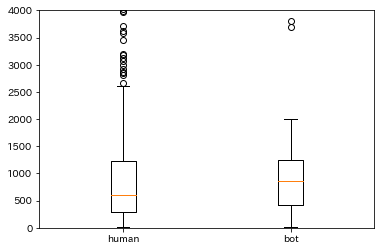

In [20]:
hm_fc = train.loc[train['bot']==0,'friends_count']
bt_fc = train.loc[train['bot']==1,'friends_count']
val = ( hm_fc, bt_fc)
fig,ax = plt.subplots()
bp=ax.boxplot(val)
ax.set_xticklabels(['human','bot'])
plt.ylim([0,4000])
plt.show()

In [10]:
hm_fc

0        423
1       1457
2        691
3        285
4        907
5        195
6        408
7       1992
8        625
9        389
10       187
11       123
12      1125
15       102
16       739
17      1090
18      1739
19      1852
20      2239
21       472
22       504
23       404
24       126
25       192
26       786
27       357
29       352
30       264
31       135
32      3715
        ... 
1556     526
1557     954
1558    1778
1559     334
1560     670
1561     133
1562     731
1563    1857
1564    1397
1565    1799
1566     391
1568    1121
1569     354
1570     646
1571     681
1572    1484
1573     397
1574    1407
1575    1908
1576     430
1578    1023
1579     497
1580     335
1581     540
1582    1048
1583     153
1584     241
1585    1996
1586     621
1587     244
Name: friends_count, Length: 1345, dtype: int64